In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## Importing datasets and combining it together

In [2]:
dataset05 = pd.read_csv("D:/programming/dataverse_files/2005.csv")
dataset06 = pd.read_csv("D:/programming/dataverse_files/2006.csv")
full_dataset = pd.concat([dataset05, dataset06])
full_dataset.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


In [3]:
full_dataset.shape

(14282518, 29)

## Checking for null values

In [4]:
pd.isnull(full_dataset).sum(axis = 0)

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                255664
CRSDepTime                  0
ArrTime                285878
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime      285878
CRSElapsedTime              4
AirTime                285878
ArrDelay               285878
DepDelay               255664
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14026853
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

## Removing cancellation code column

In [5]:
full_dataset = full_dataset.drop(columns="CancellationCode")

In [6]:
full_dataset = full_dataset.dropna()

## Correcting upper bounds for time

In [7]:
full_dataset.max()

Year                   2006
Month                    12
DayofMonth               31
DayOfWeek                 7
DepTime              2930.0
CRSDepTime             2359
ArrTime              2955.0
CRSArrTime             2359
UniqueCarrier            YV
FlightNum              9619
TailNum              n816ca
ActualElapsedTime    1879.0
CRSElapsedTime        660.0
AirTime              1958.0
ArrDelay             1925.0
DepDelay             1930.0
Origin                  YUM
Dest                    YUM
Distance               4962
TaxiIn                 1523
TaxiOut                1339
Cancelled                 0
Diverted                  0
CarrierDelay           1925
WeatherDelay           1510
NASDelay               1392
SecurityDelay           354
LateAircraftDelay      1366
dtype: object

In [8]:
full_dataset["DepTime"] = full_dataset["DepTime"].apply(lambda x : np.nan if x > 2400 else x)
full_dataset["ArrTime"] = full_dataset["ArrTime"].apply(lambda x : np.nan if x > 2400 else x)

## Removing unrealistic values for departure and arrival delay

In [9]:
full_dataset = full_dataset[full_dataset["DepDelay"] > -120]
full_dataset = full_dataset[full_dataset["ArrTime"] > -120]

## Calculating total delay

In [10]:
total_delay = (full_dataset["ArrDelay"] + full_dataset["DepDelay"])
full_dataset["total_delay"] = total_delay

In [11]:
full_dataset.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total_delay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,0,0,0,0,0,0,-20.0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,0,0,0,0,0,0,-29.0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,0,0,0,0,0,0,-31.0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,0,0,0,0,0,0,-42.0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,0,0,0,0,0,0,37.0


## saving clean dataset

In [9]:
full_dataset.to_csv("../programming/full_datasetpy.csv")

# QUESTION 1

## Taking only the necessary columns

In [12]:
Quest1 = full_dataset[["Year","Month","DayofMonth","DayOfWeek","ArrDelay","DepDelay", "CRSDepTime", "total_delay"]]

## Calculating Average delay

In [16]:
mean_delay = (full_dataset["ArrDelay"] + full_dataset["DepDelay"]) / 2
Quest1["mean_delay"] = mean_delay

In [17]:
Quest1.head()

,Year,Month,DayofMonth,DayOfWeek,ArrDelay,DepDelay,CRSDepTime,total_delay,mean_delay
0,2005,1,28,5,-18.0,-2.0,1605,-20.0,-10.0
1,2005,1,29,6,-23.0,-6.0,1605,-29.0,-14.5
2,2005,1,30,7,-24.0,-7.0,1610,-31.0,-15.5
3,2005,1,31,1,-33.0,-9.0,1605,-42.0,-21.0
4,2005,1,2,7,3.0,34.0,1900,37.0,18.5


## Month with the least delay

In [18]:
least_delay_month = Quest1[["Month","mean_delay"]]
least_delay_month = least_delay_month.groupby(['Month']).mean()

In [19]:
least_delay_month[least_delay_month.mean_delay == least_delay_month.mean_delay.min()]

,mean_delay
Month,
4,5.465762


## Barplot to identify least delay month

In [45]:
least_delay_month = least_delay_month.reset_index()
least_delay_month

,Month,mean_delay
0,1,8.602478
1,2,7.528810
2,3,8.563385
3,4,5.465762
4,5,5.870512
5,6,11.304409
6,7,12.936717
7,8,9.325030
8,9,6.135417
9,10,8.076710


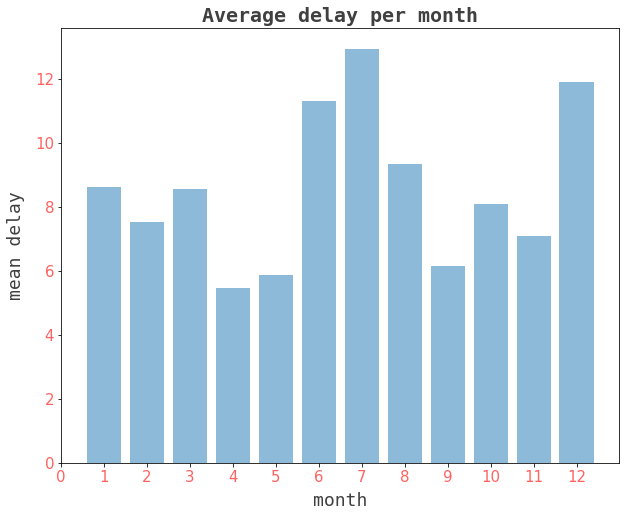

In [46]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(least_delay_month.Month, least_delay_month.mean_delay, alpha=0.5)

ax.set_ylabel('mean delay',
                 color='#404040',
                 family = 'monospace',
                 size = 18,
                 labelpad=10)
ax.set_xlabel('month',
                 color='#404040',
                 family = 'monospace',
                 size = 18,
                 labelpad=7)
ax.set_title("Average delay per month",
                color='#404040',
                family = 'monospace',
                size = 20,
                weight = 'bold')
ax.tick_params(axis='x', labelcolor='#ff6361', labelsize=15)
ax.tick_params(axis='y', labelcolor='#ff6361', labelsize=15)
plt.xticks(np.arange(0,13,1))
plt.savefig('LeastDelayMonthpy.png')
plt.show()

## Day of the week with least delay

In [47]:
least_delay_dayofweek = Quest1[["DayOfWeek","mean_delay"]]
least_delay_dayofweek = least_delay_dayofweek.groupby(['DayOfWeek']).mean()

In [48]:
 least_delay_dayofweek[least_delay_dayofweek.mean_delay == least_delay_dayofweek.mean_delay.min()]

,mean_delay
DayOfWeek,
6,5.791687


## Barplot to identify day of the week with least delay

In [49]:
least_delay_dayofweek = least_delay_dayofweek.reset_index()

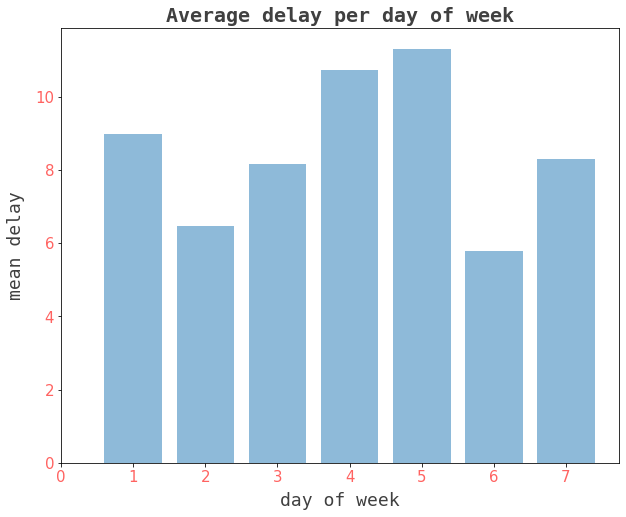

In [50]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(least_delay_dayofweek.DayOfWeek, least_delay_dayofweek.mean_delay, alpha=0.5)

ax.set_ylabel('mean delay',
                 color='#404040',
                 family = 'monospace',
                 size = 18,
                 labelpad=10)
ax.set_xlabel('day of week',
                 color='#404040',
                 family = 'monospace',
                 size = 18,
                 labelpad=7)
ax.set_title("Average delay per day of week",
                color='#404040',
                family = 'monospace',
                size = 20,
                weight = 'bold')
ax.tick_params(axis='x', labelcolor='#ff6361', labelsize=15)
ax.tick_params(axis='y', labelcolor='#ff6361', labelsize=15)
plt.xticks(np.arange(0,8,1))
plt.savefig('MeanDelayDayOfWeekpy.png')
plt.show()

## Time of the day with least delay


## Creating bins for time

In [20]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300]
time = ['0000', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000', '1100', '1200', '1300', '1400', '1500', '1600','1700', '1800', '1900', '2000', '2100', '2200', '2300' ]

d = dict(enumerate(time, 1))

Quest1['Times_HHMM'] = np.vectorize(d.get)(np.digitize(full_dataset['CRSDepTime'], bins))
Quest1.tail()

,Year,Month,DayofMonth,DayOfWeek,ArrDelay,DepDelay,CRSDepTime,total_delay,mean_delay,Times_HHMM
7141917,2006,12,29,5,-7.0,-3.0,1249,-10.0,-5.0,1200
7141918,2006,12,29,5,62.0,30.0,1155,92.0,46.0,1100
7141919,2006,12,29,5,13.0,3.0,2115,16.0,8.0,2100
7141920,2006,12,29,5,-14.0,-5.0,2127,-19.0,-9.5,2100
7141921,2006,12,29,5,-22.0,-3.0,2045,-25.0,-12.5,2000


In [53]:
least_delay_time = Quest1[["Times_HHMM","mean_delay"]]
least_delay_time = least_delay_time.groupby(['Times_HHMM']).mean()

In [54]:
least_delay_time[least_delay_time.mean_delay == least_delay_time.mean_delay.min()]

,mean_delay
Times_HHMM,
500,0.080741


## Barplot for time of the day with least delay

In [55]:
least_delay_time = least_delay_time.reset_index()
least_delay_time

,Times_HHMM,mean_delay
0,0000,4.686046
1,100,3.076382
2,1000,5.115607
3,1100,5.820075
4,1200,6.972648
5,1300,8.715685
6,1400,10.239800
7,1500,11.548277
8,1600,12.975841
9,1700,14.842134


In [56]:
least_delay_time["Times_HHMM"] = least_delay_time["Times_HHMM"].apply(int)

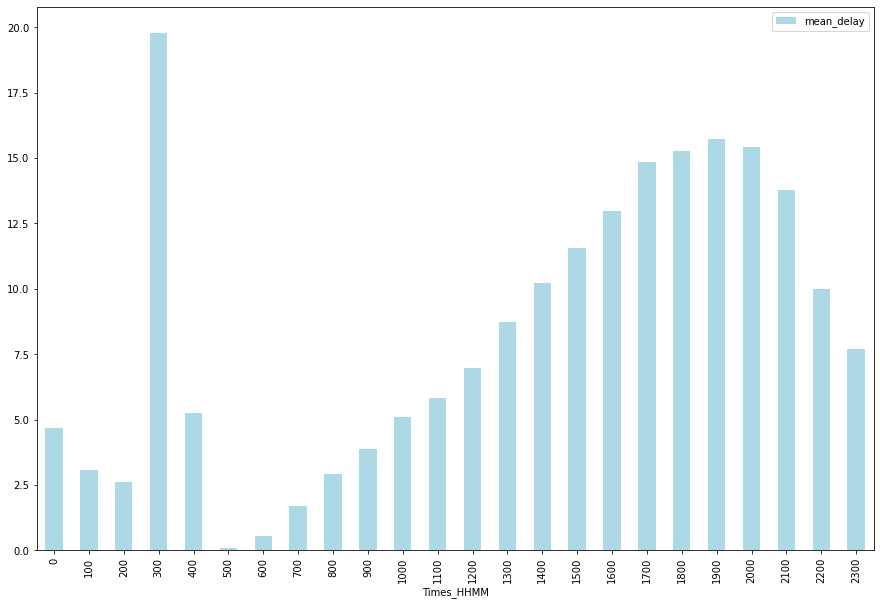

In [57]:
fig = least_delay_time.sort_values("Times_HHMM").plot(kind = "bar", x = "Times_HHMM", y="mean_delay",figsize=(15, 10), color = '#ADD8E6').get_figure().savefig('meandelayperhourpy.png')